In [6]:
# Import necessary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
# Load the dataset

sales_data = pd.read_csv("D:\\proje\\supermarket_sales.csv")

In [8]:
print("First few rows of the dataset:")
print(sales_data.head())

First few rows of the dataset:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905

In [9]:
# Check for missing values

print("\nMissing values in the dataset:")
print(sales_data.isnull().sum())


Missing values in the dataset:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [10]:
print("\nSummary statistics:")
print(sales_data.describe())



Summary statistics:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.76

In [11]:
# Data Cleaning
# Drop rows with missing values

sales_data.dropna(inplace=True)


In [12]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

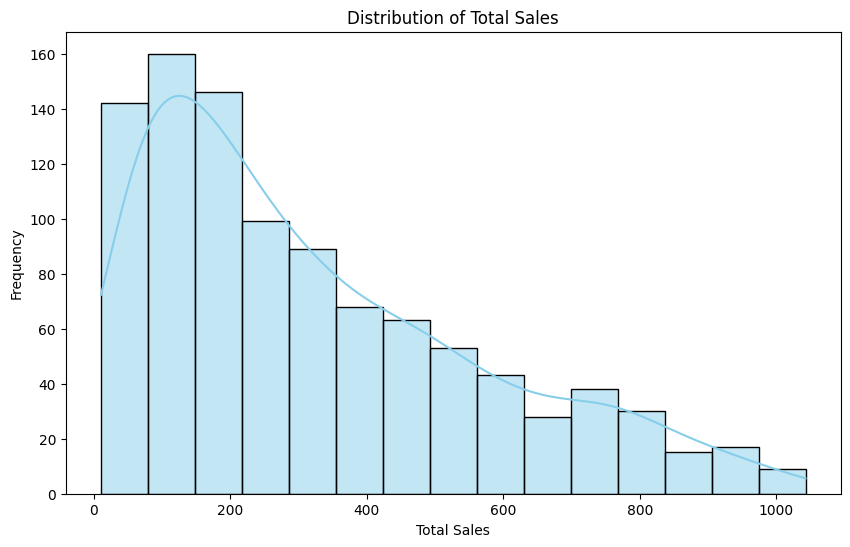

In [13]:
# Distribution of Total Sales

plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Total'], kde=True, color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales')
plt.show()


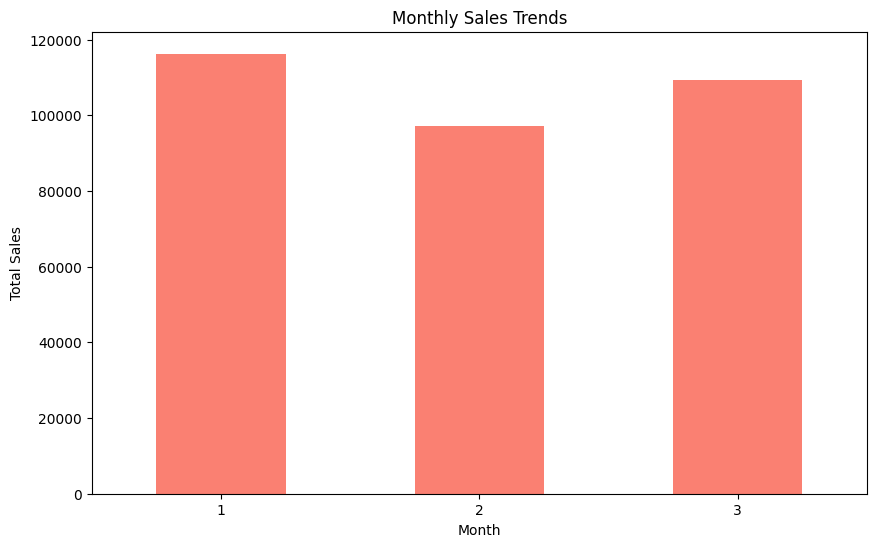

In [14]:
# Monthly Sales Trends
sales_data['Month'] = sales_data['Date'].dt.month
monthly_sales = sales_data.groupby('Month')['Total'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='salmon')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=0)
plt.show()

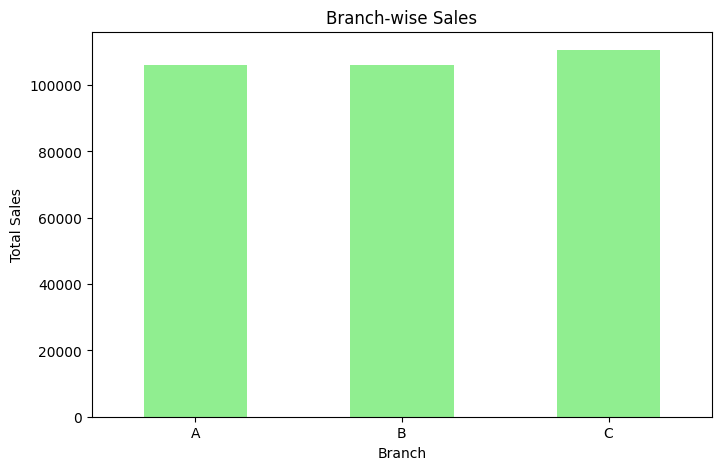

In [15]:
# Branch-wise Sales
branch_sales = sales_data.groupby('Branch')['Total'].sum()

plt.figure(figsize=(8, 5))
branch_sales.plot(kind='bar', color='lightgreen')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Branch-wise Sales')
plt.xticks(rotation=0)
plt.show()

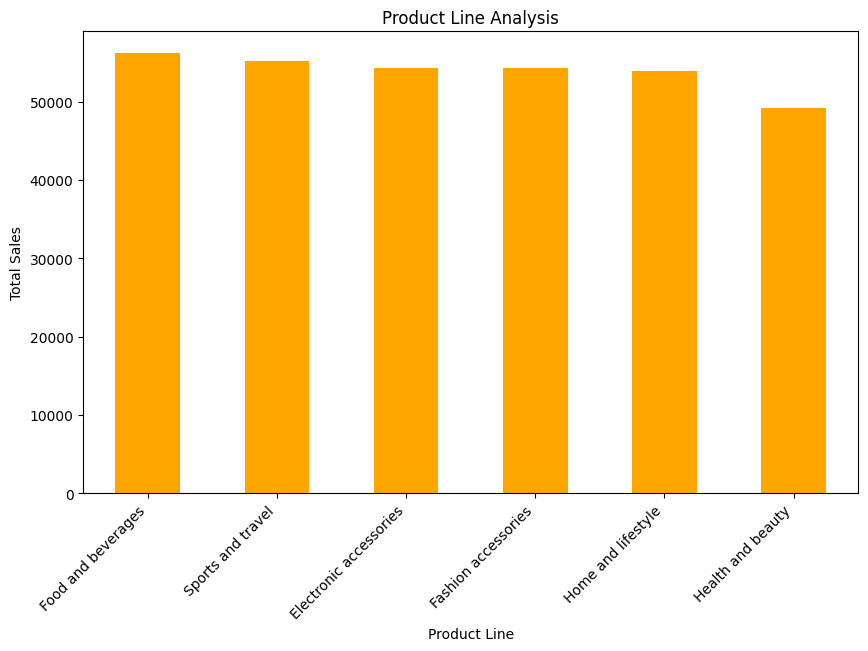

In [16]:
# Product Line Analysis
product_line_sales = sales_data.groupby('Product line')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
product_line_sales.plot(kind='bar', color='orange')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Product Line Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()

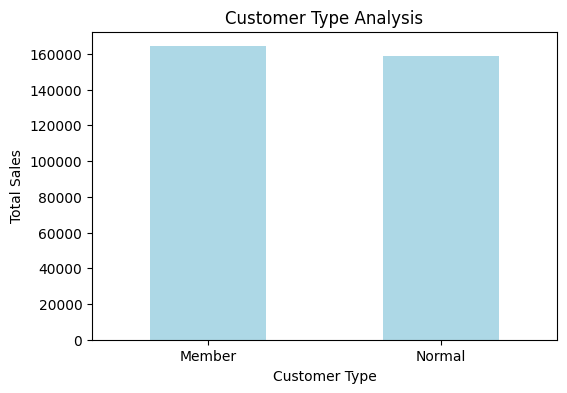

In [17]:
# Customer Type Analysis
customer_type_sales = sales_data.groupby('Customer type')['Total'].sum()

plt.figure(figsize=(6, 4))
customer_type_sales.plot(kind='bar', color='lightblue')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Customer Type Analysis')
plt.xticks(rotation=0)
plt.show()

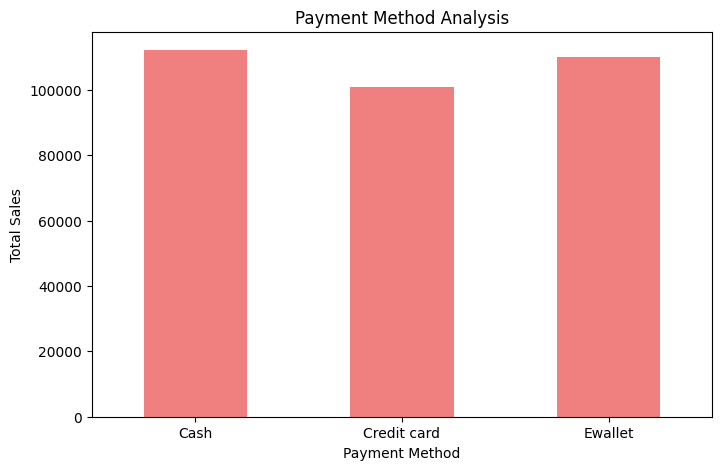

In [18]:
# Payment Method Analysis
payment_method_sales = sales_data.groupby('Payment')['Total'].sum()

plt.figure(figsize=(8, 5))
payment_method_sales.plot(kind='bar', color='lightcoral')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.title('Payment Method Analysis')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

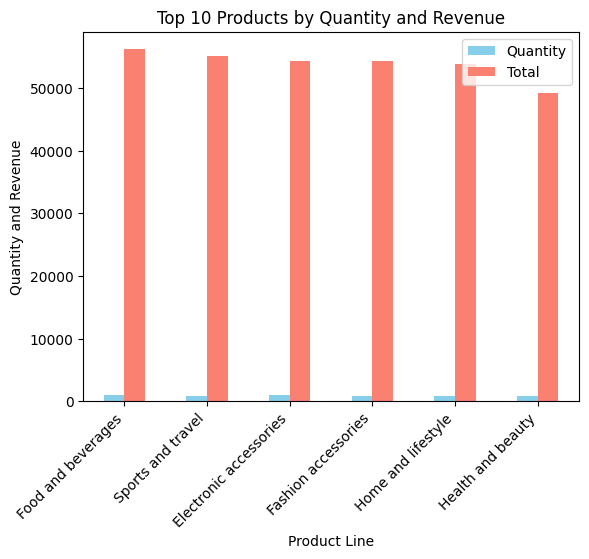

In [21]:
# Product-wise Quantity and Revenue Analysis
product_stats = sales_data.groupby('Product line')[['Quantity', 'Total']].sum().sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(10, 6))
product_stats.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Product Line')
plt.ylabel('Quantity and Revenue')
plt.title('Top 10 Products by Quantity and Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


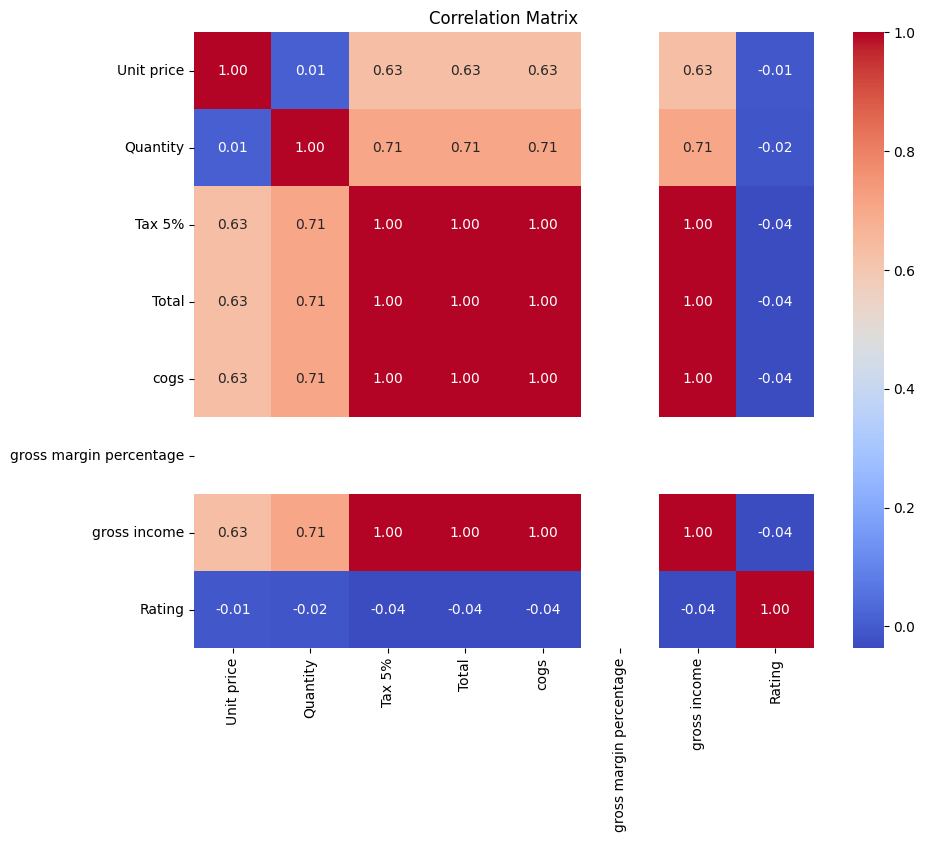

In [23]:
# Select only numeric columns for correlation matrix calculation
numeric_columns = sales_data.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [26]:
# Skewness and Kurtosis of Total Sales
skewness = skew(sales_data['Total'])
kurt = kurtosis(sales_data['Total'])

print("\nSkewness of Total Sales:", skewness)
print("Kurtosis of Total Sales:", kurt)


Skewness of Total Sales: 0.8912303920037631
Kurtosis of Total Sales: -0.08746991289329031
